In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
# 데이터를 불러오는 코드를 작성해주세요.
fashion_mnist = keras.datasets.fashion_mnist
((train_images, train_labels), (test_images, test_labels))= fashion_mnist.load_data()

In [3]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
print(f"train_images.shape: {train_images.shape}")
print(f"train_labels.shape: {train_labels.shape}")
print(f"test_images.shape: {test_images.shape}")
print(f"test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [4]:
# 레이블을 설정해보세요.
labels = ["T-shirt/top",  # index 0
        "Trouser",      # index 1
        "Pullover",     # index 2 
        "Dress",        # index 3 
        "Coat",         # index 4
        "Sandal",       # index 5
        "Shirt",        # index 6 
        "Sneaker",      # index 7 
        "Bag",          # index 8 
        "Ankle boot"]   # index 9
def idx2label(idx):
    return labels[idx]

In [5]:
idx2label(test_labels[0])

'Ankle boot'

In [6]:
test_labels[0]

9

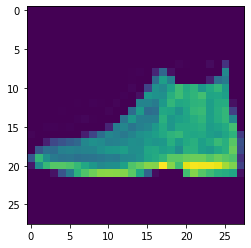

Ankle boot


In [7]:
plt.imshow(test_images[0])
plt.show()
print(idx2label(test_labels[0]))

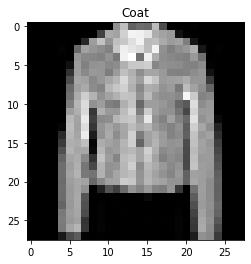

In [8]:
plt.imshow(test_images[10], cmap="gray")
plt.title(idx2label(test_labels[10]))
plt.show()

In [9]:
def show(idx):
    plt.imshow(train_images[idx])#, cmap="gray")
    plt.title(idx2label(train_labels[idx]))
    plt.show()

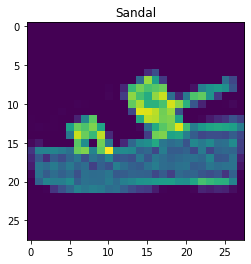

In [10]:
show(12)

In [11]:
train_images[train_images != 0][:5]

array([ 1, 13, 73,  1,  4], dtype=uint8)

## 이미지의 값이 가장 큰 idx와 작은 idx를 구하여 출력해보세요 = argmax

In [16]:
train_images.reshape((60000,-1)).sum(axis=1).argmax()

55023

In [17]:
train_images.reshape((60000,-1)).sum(axis=1).argmin()

9230

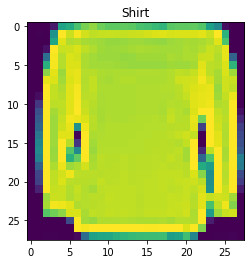

In [18]:
show(55023)

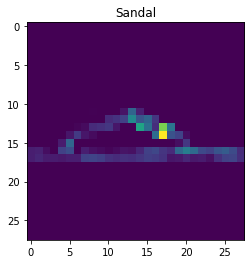

In [19]:
show(9230)

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
train_images.reshape((60000,-1)).shape

(60000, 784)

In [22]:
train_images.reshape((60000,-1)).sum(axis=1).shape

(60000,)

In [23]:
train_images.reshape((60000,-1)).sum(axis=1)[0]

76247

In [24]:
train_images.reshape((60000,-1)).sum(axis=1)[55023]

150387

In [25]:
train_images.dtype

dtype('uint8')

In [26]:
print(  train_images.min(), train_images.max())
print(  test_images.min(), test_images.max())

print(  train_labels.min(), train_labels.max())
print(  test_labels.min(), test_labels.max())

0 255
0 255
0 9
0 9


In [27]:
print(train_images.dtype)
print(test_images.dtype)

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

uint8
uint8
0 255
0 255


In [28]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [29]:
print(train_images.dtype)
print(test_images.dtype)

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

float64
float64
0.0 255.0
0.0 255.0


In [30]:
# images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.
(train_images / 255.0).min(), (train_images / 255.0).max()

(0.0, 1.0)

일반적으로 0-1사의의 값을 가지게 하기 위해서는 다음 수식을 사용합니다.

$$normalize(x) = \frac{x - 최소값}{최대값 - 최소값}$$

이 경우 최소값이 0이기 떄문에 다음과 같이 간편하게 구할 수 있습니다.

$$normalize(x) = \frac{x}{최대값}$$

In [31]:
def norm(data):
    min_v = data.min()
    max_v = data.max()
    return (data - min_v)/(max_v - min_v)

In [32]:
print( norm(train_images).min(), norm(train_images).max())
print( norm(test_images).min(), norm(test_images).max())

0.0 1.0
0.0 1.0


In [33]:
# 스케일링 방법을 바꿔서 시도하기
a = norm(train_images)*3
print(a.min(), a.max())

a = norm(train_images)*4
print(a.min(), a.max())

0.0 3.0
0.0 4.0


In [34]:
train_images = norm(train_images)
test_images = norm(test_images)

## 시각화

In [36]:
# (60000, 28, 28)인 train_images에서 (5, 28, 28)을 획득하는 코드를 작성하세요.
train_images[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [37]:
train_images[:5].transpose((1,0,2)).shape

(28, 5, 28)

In [38]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose((1,0,2)).reshape((28,-1)).shape

(28, 140)

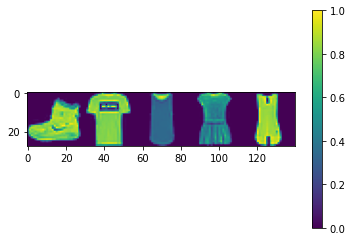

In [39]:
plt.imshow(train_images[:5].transpose((1,0,2)).reshape((28,-1)))
plt.colorbar()
plt.show()

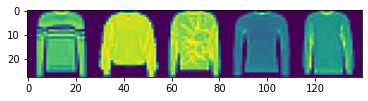

In [40]:
plt.imshow(  train_images[ np.argwhere(  train_labels ==  2  )[:5, ..., 0]  ] . transpose((1, 0, 2)).reshape((28, -1)) )

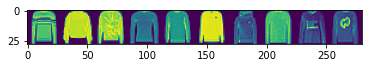

In [73]:
plt.imshow(train_images[ np.argwhere( train_labels == 2)[:10, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1)))

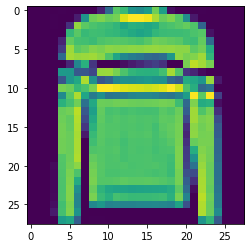

In [74]:
plt.imshow(train_images[ np.argwhere( train_labels == 2)[:1, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1)))

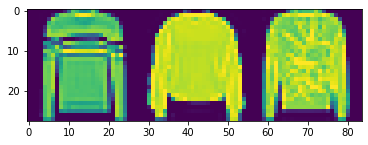

In [75]:
plt.imshow(train_images[ np.argwhere( train_labels == 2)[:3, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1)))

In [76]:
def label_filter(label, count = 5):
    imgs = train_images[ np.argwhere( train_labels == label)[:count, ..., 0]]. transpose((1, 0, 2)).reshape((28, -1))
    plt.imshow(imgs)
    plt.show()

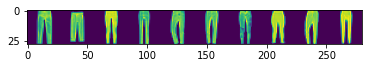

In [78]:
label_filter(1, 10)

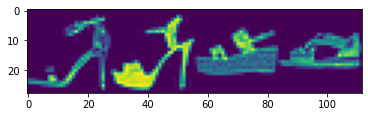

In [79]:
label_filter(5, 4)

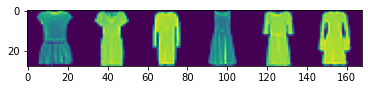

In [80]:
label_filter(3, 6)

## Data augmentation - 이미지 확대 및 다 객체 추가

In [103]:
def expand_4times(img):
    bg = np.zeros(img.shape)
    idx = np.random.randint(0, 4)
    
    slots = [bg, bg, bg, bg]
    slots[idx] = img
    
    expanded = np.vstack([
                            np.hstack(slots[:2]),
                            np.hstack(slots[2:])
    ])
    
    return expanded

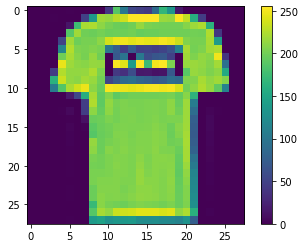

In [104]:
plt.imshow(train_images[1])
plt.colorbar()

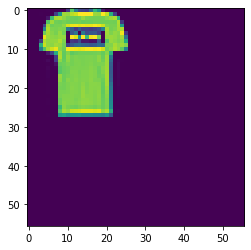

In [108]:
plt.imshow(expand_4times(train_images[1]))

In [113]:
train_images  = norm(train_images)
test_images  = norm(test_images)

In [114]:
train_expand_images = np.array([expand_4times(img) for img in train_images])
test_expand_images = np.array([expand_4times(img) for img in test_images])

In [115]:
print(test_expand_images.shape, train_expand_images.shape)
print(test_expand_images.dtype, train_expand_images.dtype)

print(test_expand_images.min(), train_expand_images.min())
print(test_expand_images.max(), train_expand_images.max())

(10000, 56, 56) (60000, 56, 56)
float64 float64
0.0 0.0
1.0 1.0


In [125]:
def expand_4times_rand(train_data, label_data):
    img = []
    label = []
    
    for _ in range(4):
        bg = np.zeros((28, 28))
        idx_count = np.random.randint(0, 5)
        
        label = np.zeros((10,)) # [0,0,0,0,......]

        slots = [bg, bg, bg, bg]
        
        for idx in range(idx_count):
            i = np.random.randint(len(train_data))
            slots[idx] = train_data[i]
            label += tf.keras.utils.to_categorical(label_data[i], 10)
        
        np.random.shuffle(slots)
    
    new_img = np.vstack([
                            np.hstack(slots[:2]),
                            np.hstack(slots[2:])
    ])
    img.append(new_img)
    labels.append((label >= 1 ).astype(np.int))
    
    
    return np.array(img), np.array(label)

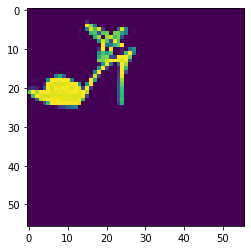

In [126]:
plt.imshow(expand_4times_rand(train_images, train_labels)[0][0])

In [137]:
def expand_4times_rand(x_data, y_data):
    images = []
    labels = []

    for _ in range(4):
        bg = np.zeros((28, 28))
        obj_count = np.random.randint(0, 5)

        label = np.zeros((10,)) # [0,0,0,0,0,0,0 ...]
        slots = [bg, bg, bg, bg]

        for idx in range(obj_count):
            i = np.random.randint(len(x_data))
            slots[idx] = x_data[i]
            label += tf.keras.utils.to_categorical(y_data[i], 10)
            
        np.random.shuffle(slots)

    new_img = np.vstack([
                          np.hstack(slots[:2]),
                          np.hstack(slots[2:])
    ])
    images.append(new_img)
    labels.append((label >= 1 ).astype(np.int))    
    return np.array(images), np.array(labels)

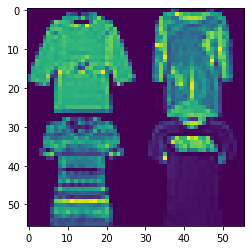

In [138]:
plt.imshow(expand_4times_rand(train_images, train_labels)[0][0])

In [166]:
train_multi_images, train_multi_labels = list(zip(*[expand_4times_rand(train_images, train_labels) for i in train_images]))
test_multi_images, test_multi_labels = list(zip(*[expand_4times_rand(test_images, test_labels) for i in test_images]))

In [145]:
len(train_multi_images) # shape (60000, 1, 56, 56)

60000

In [146]:
len(train_multi_images[0])

1

In [147]:
len(train_multi_images[0][0])

56

In [148]:
len(train_multi_images[0][0][0])

56

In [149]:
len(train_multi_images[0][0][0][0])

TypeError: object of type 'numpy.float64' has no len()

In [144]:
type(train_multi_images)

tuple

In [150]:
train_multi_images = np.array(train_multi_images)

In [151]:
train_multi_images.shape

(60000, 1, 56, 56)

In [153]:
train_multi_images.shape

(60000, 56, 56)

In [169]:
train_multi_images = np.array(train_multi_images)[:,0,:,:].reshape(-1, 56, 56, 1)
train_multi_labels = np.array(train_multi_labels)[:,0,:]

In [167]:
test_multi_images = np.array(test_multi_images)[:,0,:,:].reshape(-1, 56, 56, 1)
test_multi_labels = np.array(test_multi_labels)[:,0,:]

In [172]:
print(train_multi_images.shape, train_multi_labels.shape)
print(test_multi_images.shape, test_multi_labels.shape)

(60000, 56, 56, 1) (60000, 10)
(10000, 56, 56, 1) (10000, 10)
